In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
# import plotly.express as px

(8630, 1920, 3)


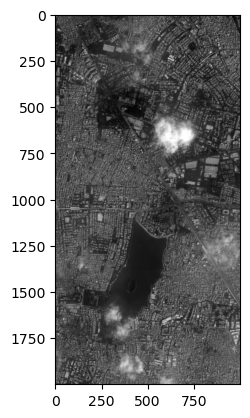

In [3]:
# file = "D:/Satsure/Argus/Data/Satellogic/Satellogic_1m_20220823_20220202_044541_SN8_L1_MS_45254_3smSLKt/20220202_044541_SN8_L3_MS_preview.png"
file = "H:/SatSure/Dataset/20220202_044541_SN8_L1_MS_45254_3smSLKt/20220202_044541_SN8_L3_MS_preview.png"
data = gdal.Open(file).ReadAsArray()
data = np.swapaxes(data, 0,2).swapaxes(0,1)
print(data.shape)
r1,r2, c1,c2 = 5000,7000, 300,1300,
data = data[r1:r2, c1:c2,:]
plt.imshow(data[:,:,0], cmap="gray")


In [4]:
class Fourier:
    def __init__(self,r1, r2, r3, r4):
        self.r1 = r1
        self.r2 = r2
        self.c1 = c1
        self.c2 = c2
        None
        
    def fourier(self, img_path, band):
        if type(img_path)==str:
            im = gdal.Open(img_path)
            data = im.ReadAsArray().swapaxes(0,2).swapaxes(0,1)
            data=data[r1:r2, c1:c2,band]
        else:
            data = img_path
        self.four = np.fft.fft2(data)
        self.fourier_shift = np.fft.fftshift(self.four)
        self.four_dis = np.log(abs(self.fourier_shift))
        print("Output is plotting, fourier_shift, fourier normal")
        return self.four_dis, self.fourier_shift, self.four

out = Fourier(r1,r2,c1,c2)
ft_pl, ft_s, ft = out.fourier(file,1)
# plt.figure(num=None, figsize=(30,30), dpi=300)
# plt.imshow(ft, cmap="gray")


Output is plotting, fourier_shift, fourier normal


In [5]:
(np.min(ft.real), np.max(ft.real)), (np.min(ft.imag), np.max(ft.imag))

((-4557014.870725948, 131966914.0), (-9255135.10718912, 9255135.10718912))

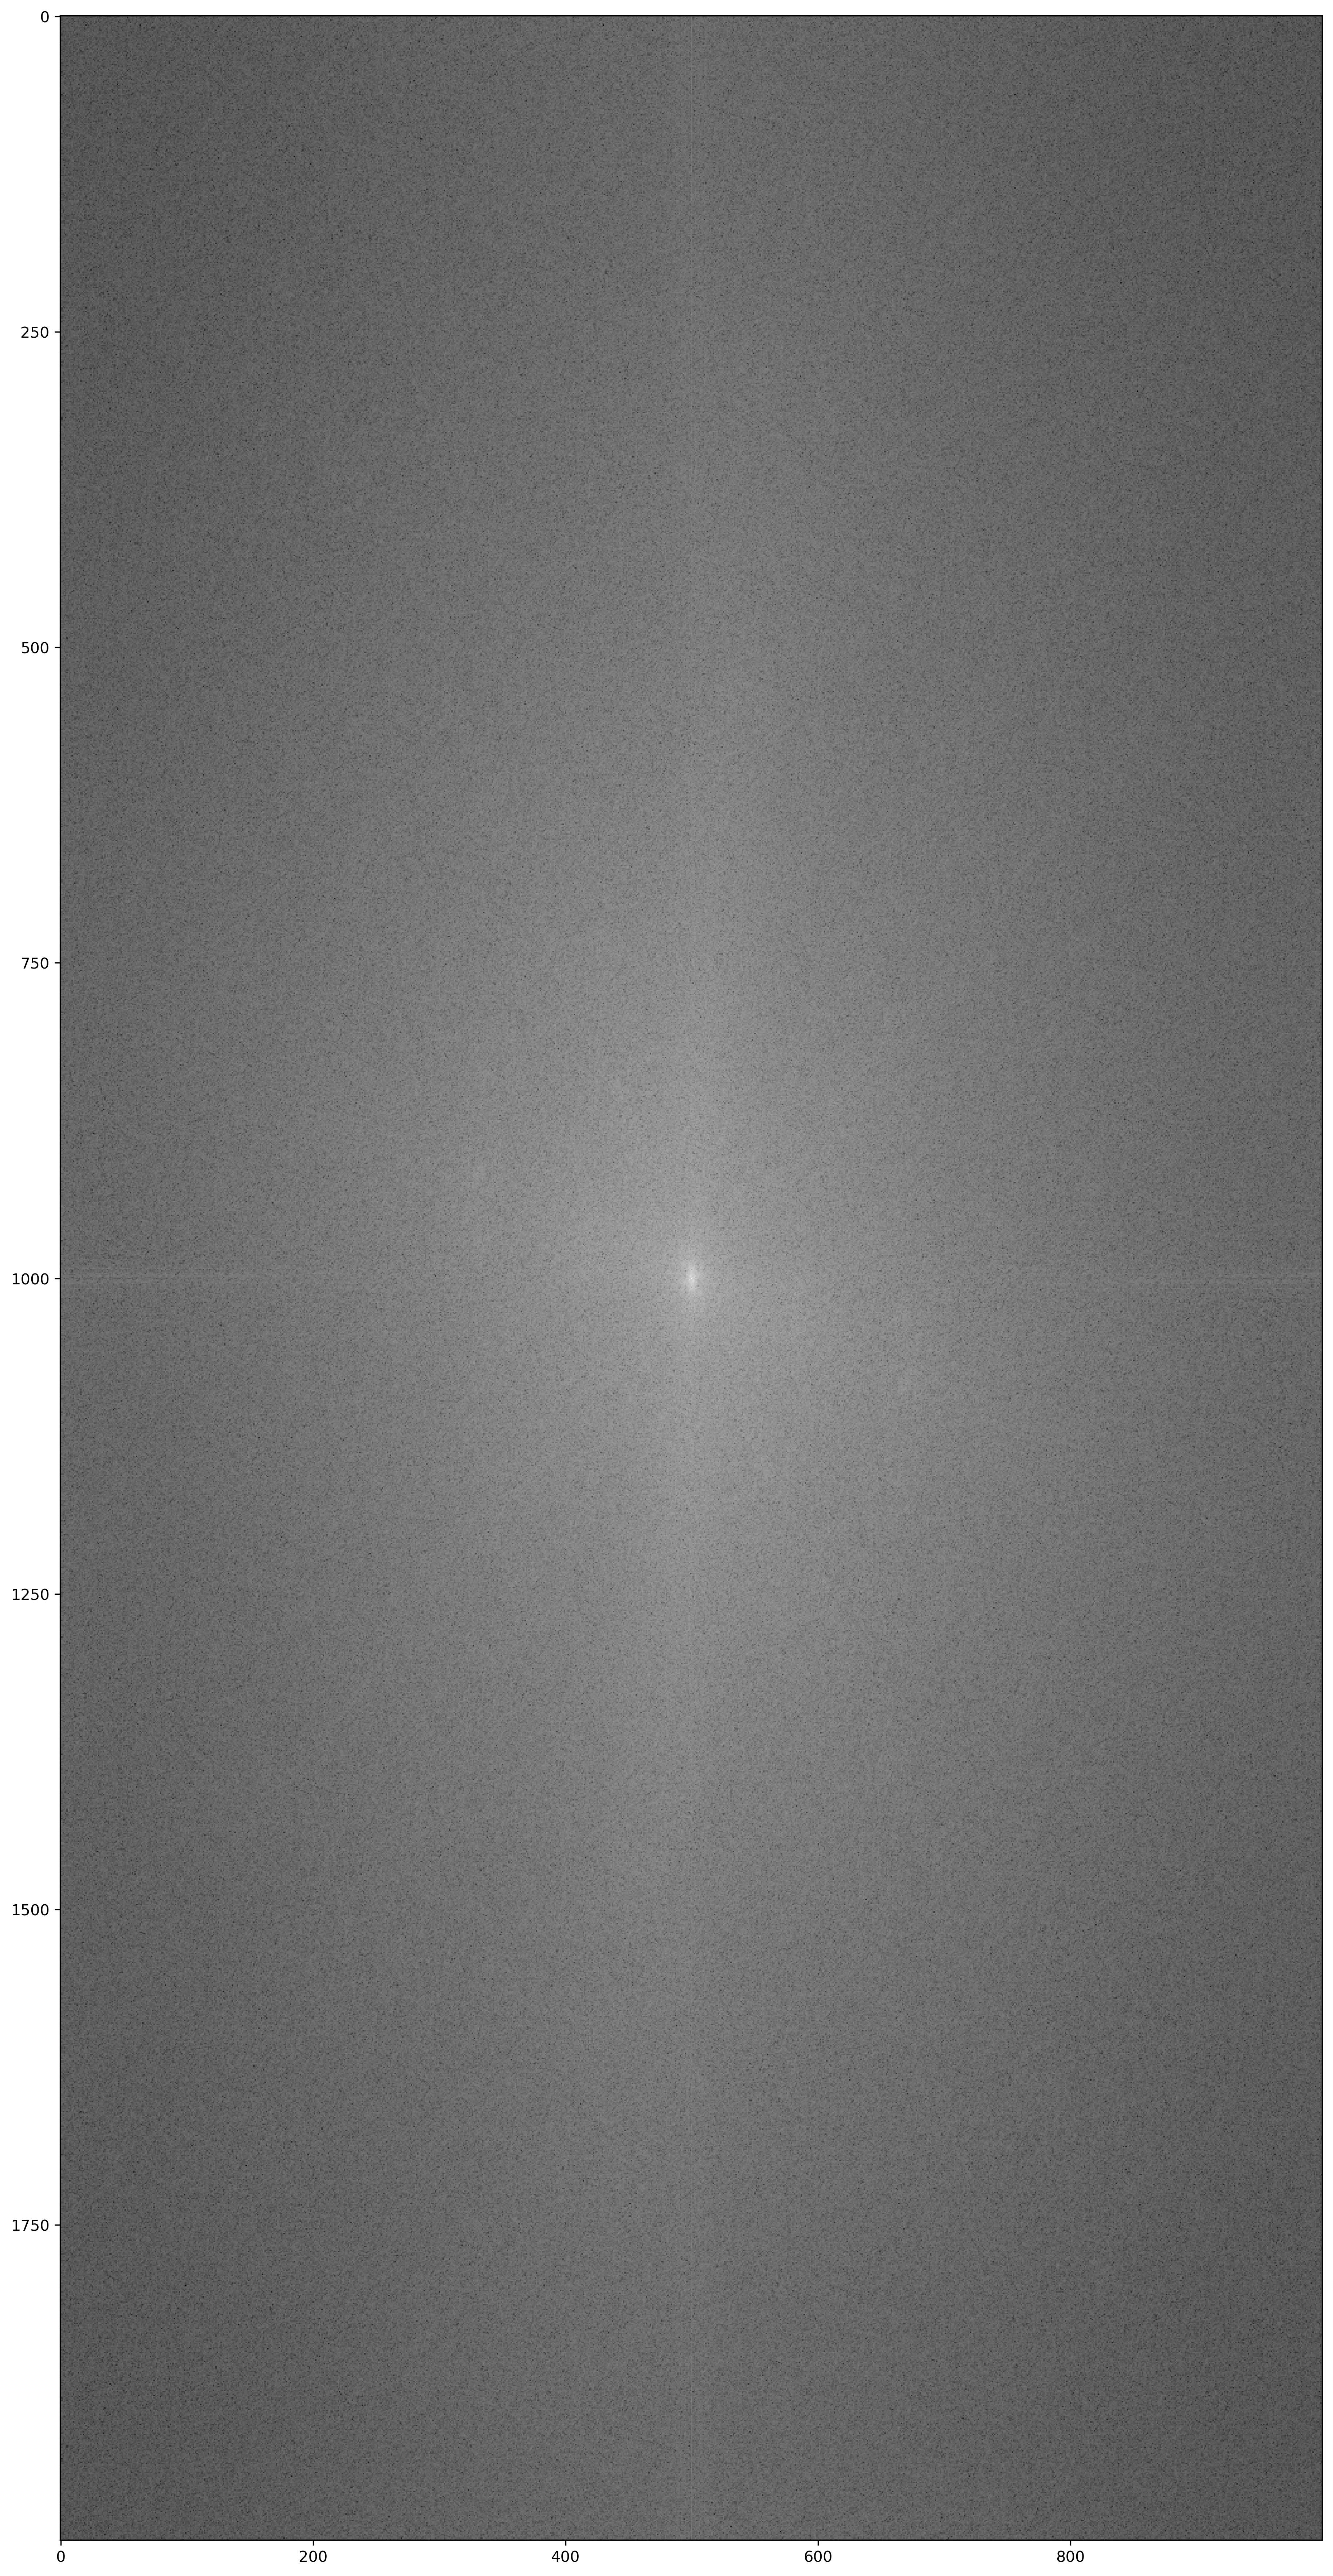

In [6]:
plt.subplots(nrows=1, ncols=1, figsize=(30,30), dpi = 300)
plt.imshow(ft_pl, cmap="gray")

In [7]:
# def on_hover(event):
#     if event.inaxes == ax:  # Check if cursor is within the plot
#         x, y = int(event.xdata), int(event.ydata)  # Convert to pixel indices
#         if 0 <= x < ft.shape[1] and 0 <= y < ft.shape[0]:  # Ensure within bounds
#             pixel_value = data[y, x]
#             print(f"Pixel: ({x}, {y}), Value: {pixel_value:.4f}")
# plt.ion()
# fig, ax = plt.subplots(dpi=300, figsize = (30,30))
# cax = ax.imshow(ft, cmap="gray")
# fig.canvas.mpl_connect("motion_notify_event", on_hover)
# plt.show()

# # dpi = 300  # Adjust DPI
# # figsize_inches = (30, 30)  # Width x Height in inches
# # figsize_px = (figsize_inches[0] * dpi, figsize_inches[1] * dpi)  # Convert to pixels

# # Create interactive heatmap
# fig = px.imshow(ft, color_continuous_scale="gray",
#                 labels={"x": "Pixel X", "y": "Pixel Y", "color": "Value"},
#                 # width=figsize_px[0], height=figsize_px[1]
#                )  # Set size

# # Enable hover info (shows pixel location & value)
# fig.update_traces(hovertemplate="Pixel: (%{x}, %{y})<br>Value: %{z:.4f}")

# # Enable zoom, pan, and box selection
# fig.update_layout(
#     dragmode="zoom",  # Options: "zoom", "pan", "lasso", "select"
#     autosize=False,
#     xaxis=dict(scaleanchor="y", constrain="domain"),  # Maintain aspect ratio
#     yaxis=dict(scaleanchor="x", constrain="domain"),
#     hovermode="closest",  # Cursor shows closest pixel value
# )

# fig.show(config={"scrollZoom": True})

In [8]:
np.max(ft.real), np.min(ft.real), np.mean(ft.real), np.std(ft.real), 

(131966914.0, -4557014.870725948, 75.00000000000004, 97215.65638054401)

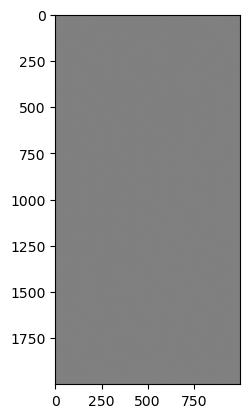

In [9]:
plt.imshow(ft.imag, cmap="gray")

In [10]:
np.max(ft.imag), np.min(ft.imag), np.mean(ft.imag), np.std(ft.imag), 

(9255135.10718912,
 -9255135.10718912,
 -5.878973752260208e-15,
 28816.706673386532)

## Fourier on an image pattern

In [100]:
def pattern(y,x, w):
    im1 = np.zeros(shape=(y,x))
    for i in range(0,y,w*2):
        im1[i:i+2,:]=1
        im1[i+2:i+4,:]=0
    return im1
    

In [101]:
y=10
for i in range(2,y,2):
    print(i)
    
    # im1[i:i+2,:]=1

2
4
6
8


In [102]:
c= pattern(10,10,2)
print(c.shape)

(10, 10)


In [103]:
c

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

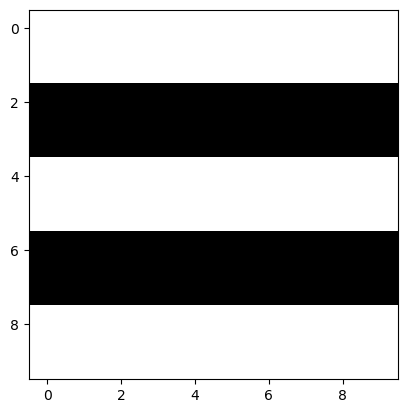

In [104]:
plt.imshow(c, cmap="gray")

In [105]:
# fob = Fourier(None,None,None,None)
# ft_p, ft_s, ft = fob.fourier(c,None)

In [106]:
ft = np.fft.fft2(c)
# ft_log = np.log(abs(ft))
ft_s = np.fft.fftshift(ft)
ft_log = np.log(abs((ft_log)))

In [107]:
np.max(ft.real), np.min(ft.real)

(60.0, -11.180339887498949)

In [108]:
print("Real: ", ft.real, "\n")
print("Imaginary: ", ft.imag)

Real:  [[ 6.00000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.11803399e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.11803399e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.11803399e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.18033989e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.88178420e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000

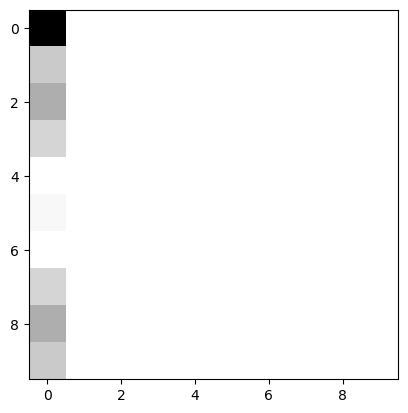

In [109]:
plt.imshow(ft_log, cmap="gray")

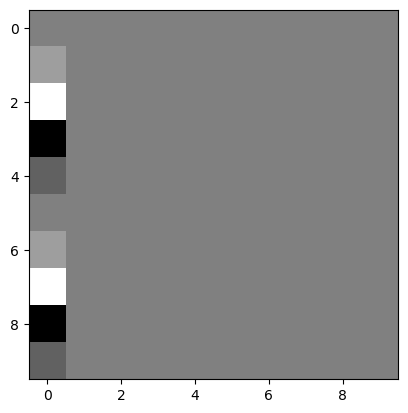

In [110]:
plt.imshow(ft.imag, cmap="gray")

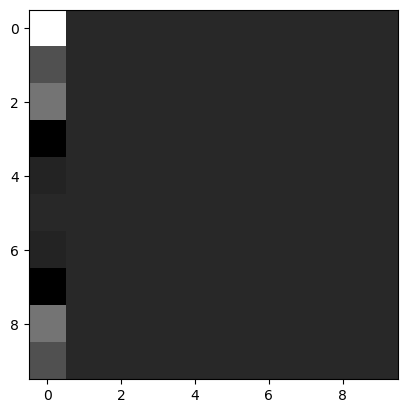

In [111]:
plt.imshow(ft.real, cmap = "gray")

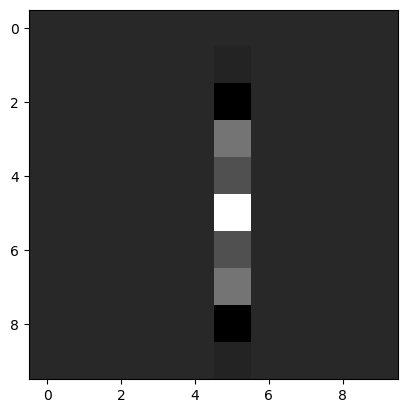

In [112]:
plt.imshow(ft_s.real, cmap="gray")

In [113]:
idx = np.where(ft_s.real == np.max(ft_s.real))
print(idx)

(array([5], dtype=int64), array([5], dtype=int64))


In [114]:
ft_sn = ft_s
ft_sn[0:3,5] = 0


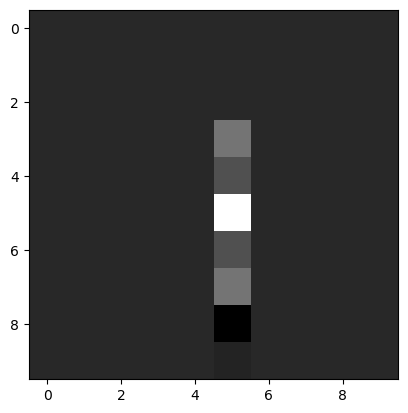

In [115]:
plt.imshow(ft_sn.real, cmap="gray")

In [116]:
new_fft = np.fft.ifft2(np.fft.ifftshift(ft_sn))
# new_fft = np.fft.ifftshift(np.fft.ifft2(ft_sn))

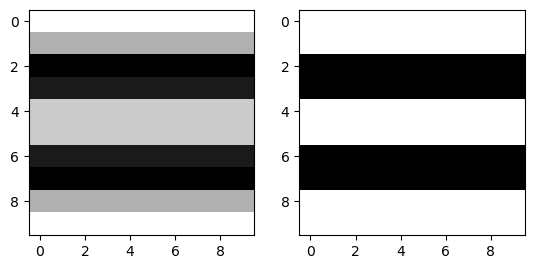

In [125]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(new_fft.real, cmap="gray")
ax[1].imshow(c, cmap="gray")

## Here ends the first successful implementation of fourier transform while clearing some of the low frequencies and visualzing the results